<font face='serif' size=4>
<span style="line-height: 1.25;">

# HW7 for Statistics with Meteorological Application
---
Student: 林之然 (B11209005, 大氣二), 蔡知諺（B11209014, 大氣二）

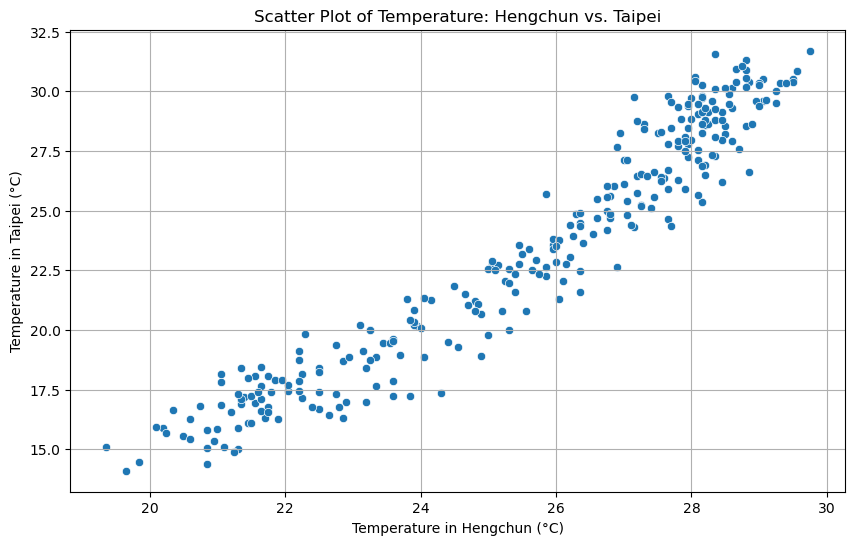

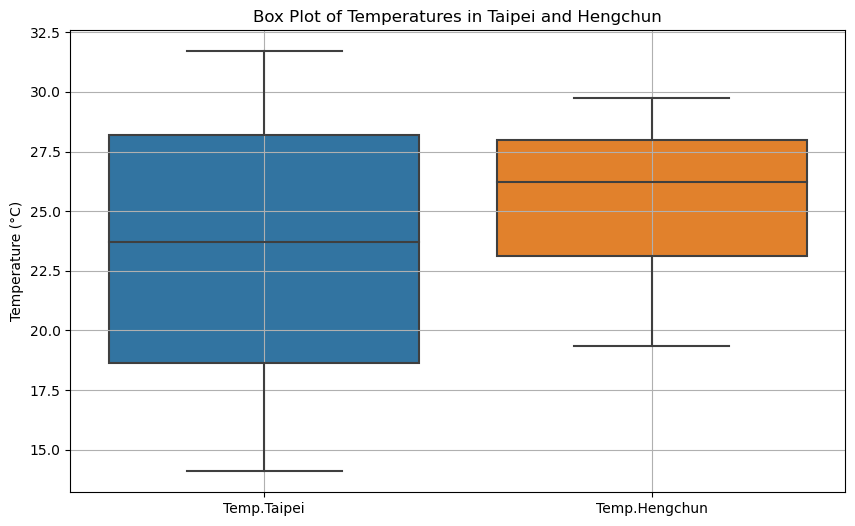

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the training data
training_data_path = '/Users/ludong/PROGRAM/112-2/Statistics/hw7/Data_slr_training_hw.xlsx'
training_data = pd.read_excel(training_data_path)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp.Hengchun', y='Temp.Taipei', data=training_data)
plt.title('Scatter Plot of Temperature: Hengchun vs. Taipei')
plt.xlabel('Temperature in Hengchun (°C)')
plt.ylabel('Temperature in Taipei (°C)')
plt.grid(True)
plt.show()

# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=training_data[['Temp.Taipei', 'Temp.Hengchun']])
plt.title('Box Plot of Temperatures in Taipei and Hengchun')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X_train = training_data[['Temp.Hengchun']]
y_train = training_data['Temp.Taipei']

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Predictions to calculate R-squared and correlation coefficient
predictions = model.predict(X_train)
r_squared = r2_score(y_train, predictions)
correlation_coefficient = np.corrcoef(y_train, predictions)[0, 1]

slope, intercept, correlation_coefficient, r_squared

(1.7440991269466875,
 -21.133669160915503,
 0.9623947845000346,
 0.9262037212328678)

In [14]:
# Load the verification data
verification_data_path = '/Users/ludong/PROGRAM/112-2/Statistics/hw7/Data_slr_verification_hw.xlsx'
verification_data = pd.read_excel(verification_data_path)

# Display the first few rows to understand its structure
verification_data.head()

# Prepare the verification data
X_verification = verification_data[['Temp.Hengchun']]
y_verification_actual = verification_data['Temp.Taipei']

# Use the model to predict temperatures in Taipei based on Hengchun temperatures
y_verification_predicted = model.predict(X_verification)

# Calculate Mean Squared Error (MSE) and R-squared for the verification set
mse_verification = mean_squared_error(y_verification_actual, y_verification_predicted)
r_squared_verification = r2_score(y_verification_actual, y_verification_predicted)

mse_verification, r_squared_verification

print(f"MSE = {mse_verification:.3f}")
print(f"R square = {r_squared:.3f}")

MSE = 1.303
R square = 0.926
